In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime, timedelta
from matplotlib.ticker import FuncFormatter
warnings.filterwarnings('ignore')

In [2]:
# Load Dataset
df = pd.read_csv("D:/Ullas/MSc Data Analytics Capstone Project/Datasets/Passenger Journeys by Public Transport.csv")

In [3]:
# Preview
df.head()

,STATISTIC,Statistic Label,TLIST(A1),Year,C03935V04687,Mode of Transport,C01198V01436,Weeks of the year,UNIT,VALUE
0,THA24C01,Passenger Journeys,2019,2019,10,Dublin Metro Bus,1,Week 01,Number,1987891.0
1,THA24C01,Passenger Journeys,2019,2019,10,Dublin Metro Bus,2,Week 02,Number,2709579.0
2,THA24C01,Passenger Journeys,2019,2019,10,Dublin Metro Bus,3,Week 03,Number,2784678.0
3,THA24C01,Passenger Journeys,2019,2019,10,Dublin Metro Bus,4,Week 04,Number,2858346.0
4,THA24C01,Passenger Journeys,2019,2019,10,Dublin Metro Bus,5,Week 05,Number,2924821.0


In [4]:
# Basic Statistics
print("Basic Statistics:")
print(df.describe())

Basic Statistics:
         TLIST(A1)         Year  C03935V04687  C01198V01436         VALUE
count  1060.000000  1060.000000   1060.000000   1060.000000  8.680000e+02
mean   2021.000000  2021.000000     25.000000     27.000000  1.665662e+06
std       1.414881     1.414881     11.185617     15.304279  1.367626e+06
min    2019.000000  2019.000000     10.000000      1.000000  2.323100e+04
25%    2020.000000  2020.000000     17.500000     14.000000  5.799855e+05
50%    2021.000000  2021.000000     25.000000     27.000000  9.101360e+05
75%    2022.000000  2022.000000     32.500000     40.000000  2.875604e+06
max    2023.000000  2023.000000     40.000000     53.000000  5.075079e+06


Performing basic cleaning and setting up the dataset for further analysis

In [5]:
datasets = [df]

for data in datasets:
    print(data.info());

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1060 entries, 0 to 1059
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   STATISTIC          1060 non-null   object 
 1   Statistic Label    1060 non-null   object 
 2   TLIST(A1)          1060 non-null   int64  
 3   Year               1060 non-null   int64  
 4   C03935V04687       1060 non-null   int64  
 5   Mode of Transport  1060 non-null   object 
 6   C01198V01436       1060 non-null   int64  
 7   Weeks of the year  1060 non-null   object 
 8   UNIT               1060 non-null   object 
 9   VALUE              868 non-null    float64
dtypes: float64(1), int64(4), object(5)
memory usage: 82.9+ KB
None


In [6]:
# Renaming columns
df.rename(columns={'Weeks of the year': 'Weeks', 'VALUE': 'Demand'}, inplace=True)

In [7]:
df.head()

,STATISTIC,Statistic Label,TLIST(A1),Year,C03935V04687,Mode of Transport,C01198V01436,Weeks,UNIT,Demand
0,THA24C01,Passenger Journeys,2019,2019,10,Dublin Metro Bus,1,Week 01,Number,1987891.0
1,THA24C01,Passenger Journeys,2019,2019,10,Dublin Metro Bus,2,Week 02,Number,2709579.0
2,THA24C01,Passenger Journeys,2019,2019,10,Dublin Metro Bus,3,Week 03,Number,2784678.0
3,THA24C01,Passenger Journeys,2019,2019,10,Dublin Metro Bus,4,Week 04,Number,2858346.0
4,THA24C01,Passenger Journeys,2019,2019,10,Dublin Metro Bus,5,Week 05,Number,2924821.0


In [8]:
df.drop(['STATISTIC','TLIST(A1)','UNIT'], axis = 1, inplace = True)

In [9]:
df.head()

,Statistic Label,Year,C03935V04687,Mode of Transport,C01198V01436,Weeks,Demand
0,Passenger Journeys,2019,10,Dublin Metro Bus,1,Week 01,1987891.0
1,Passenger Journeys,2019,10,Dublin Metro Bus,2,Week 02,2709579.0
2,Passenger Journeys,2019,10,Dublin Metro Bus,3,Week 03,2784678.0
3,Passenger Journeys,2019,10,Dublin Metro Bus,4,Week 04,2858346.0
4,Passenger Journeys,2019,10,Dublin Metro Bus,5,Week 05,2924821.0


In [10]:
#converting year and weeks columns to date column 
df['Date'] = df['Year'].astype(str) + '-W' + df['Weeks'].str.slice(start=5).astype(int).apply(lambda x: f'{x:02}')
df['Date'] = pd.to_datetime(df['Date'] + '-1', format='%Y-W%U-%w')
df['Date'] = df['Date'].dt.strftime('%d/%m/%Y')

In [11]:
df.head()

,Statistic Label,Year,C03935V04687,Mode of Transport,C01198V01436,Weeks,Demand,Date
0,Passenger Journeys,2019,10,Dublin Metro Bus,1,Week 01,1987891.0,07/01/2019
1,Passenger Journeys,2019,10,Dublin Metro Bus,2,Week 02,2709579.0,14/01/2019
2,Passenger Journeys,2019,10,Dublin Metro Bus,3,Week 03,2784678.0,21/01/2019
3,Passenger Journeys,2019,10,Dublin Metro Bus,4,Week 04,2858346.0,28/01/2019
4,Passenger Journeys,2019,10,Dublin Metro Bus,5,Week 05,2924821.0,04/02/2019


In [12]:
df.columns

Index(['Statistic Label', 'Year', 'C03935V04687', 'Mode of Transport',
       'C01198V01436', 'Weeks', 'Demand', 'Date'],
      dtype='object')

In [13]:
desired_order = ['Year', 'Weeks', 'Date', 'Mode of Transport', 'Statistic Label', 'Demand', 'C03935V04687', 'C01198V01436']

In [14]:
df = df.reindex(columns=desired_order)

In [15]:
df.head()

,Year,Weeks,Date,Mode of Transport,Statistic Label,Demand,C03935V04687,C01198V01436
0,2019,Week 01,07/01/2019,Dublin Metro Bus,Passenger Journeys,1987891.0,10,1
1,2019,Week 02,14/01/2019,Dublin Metro Bus,Passenger Journeys,2709579.0,10,2
2,2019,Week 03,21/01/2019,Dublin Metro Bus,Passenger Journeys,2784678.0,10,3
3,2019,Week 04,28/01/2019,Dublin Metro Bus,Passenger Journeys,2858346.0,10,4
4,2019,Week 05,04/02/2019,Dublin Metro Bus,Passenger Journeys,2924821.0,10,5


In [16]:
#Dealing with the missing values on the dataset
df.interpolate(method='linear', inplace=True)

In [17]:
#formating the Deamnd column to make it more simpler 
df['Demand'] = df['Demand'].apply(lambda x: "{:,.0f}".format(x))

In [18]:
datasets = [df]

for data in datasets:
    print(data.shape)

(1060, 8)


In [19]:
datasets = [df]

for data in datasets:
    print(data.info());

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1060 entries, 0 to 1059
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               1060 non-null   int64 
 1   Weeks              1060 non-null   object
 2   Date               1060 non-null   object
 3   Mode of Transport  1060 non-null   object
 4   Statistic Label    1060 non-null   object
 5   Demand             1060 non-null   object
 6   C03935V04687       1060 non-null   int64 
 7   C01198V01436       1060 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 66.4+ KB
None


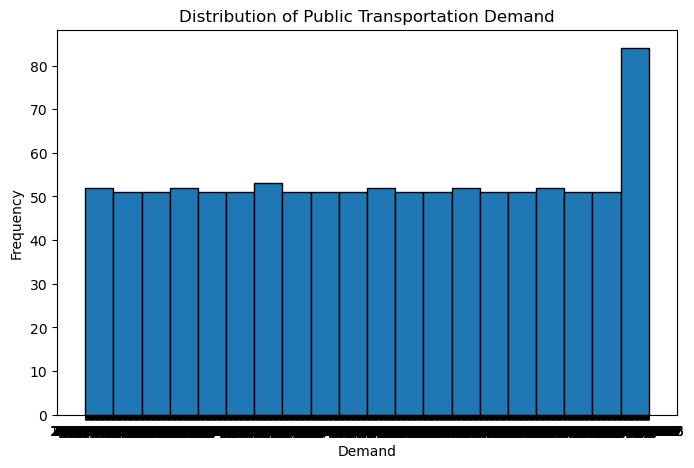

In [32]:
# Histogram to see the distribution of demand
plt.figure(figsize=(8, 5))
plt.hist(df['Demand'], bins=20, edgecolor='black')
plt.xlabel('Demand')
plt.ylabel('Frequency')
plt.title('Distribution of Public Transportation Demand')
plt.show()